<a href="https://colab.research.google.com/github/marquesgabi/Trabalho1/blob/master/ANNTrabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [19]:
# local dos dados e modifica o diretorio
#path='/home/ucfilho/Documents/Aulas/Ago_29_2018'
#os.chdir(path)
!git clone https://github.com/marquesgabi/Trabalho1/
%cd Trabalho1
!ls

Cloning into 'Trabalho1'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 26 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.
/content/Trabalho1/Trabalho1
'Dados_Experimentais_2 - Cópia.csv'  'Matéria ANN Trabalho 1.pdf'
 Dados_Experimentais_4.csv


In [0]:
# sigmoid function                                           # usa a sigmoide no neuronio oculto
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# purelin function                                           #a gaussiana é muito utilizada para classificação. aplica a purelin na saida
def purelin(x,deriv=False):
    if(deriv==True):
        return 1
    return x

# normatize funcion 
def Normatiza(x):
    strings=list(x)
    for featur in strings:
        max_feat=x[featur].max()
        min_feat=x[featur].min()
        x[featur]=(x[featur]-min_feat)/(max_feat-min_feat)
    return x

# normatize funcion
def Original(x,x_old):
    strings=list(x)
    x_old.columns = list(x)                                        
    for featur in strings:
        max_feat=x_old[featur].max()
        min_feat=x_old[featur].min()
        x[featur]=x[featur]*(max_feat-min_feat)+min_feat
    return x


In [39]:
# leitura dos dados                                               
DAT=pd.read_csv("Dados_Experimentais_2 - Cópia.csv")
print(DAT)

    Temperature   Rela_Viscosity  FracaoV
0      24.946458        1.077714     0.05
1      34.969159        1.060571     0.05
2      44.991859        1.043429     0.05
3      55.016438        1.033143     0.05
4      64.960235        1.028000     0.05
5      25.040391        1.120571     0.10
6      55.028180        1.076000     0.10
7      65.053699        1.069143     0.10
8      35.063562        1.105143     0.10
9      45.085323        1.084571     0.10
10     25.054481        1.172000     0.20
11     34.995930        1.158286     0.20
12     45.017221        1.136000     0.20
13     55.042270        1.127429     0.20
14     64.985597        1.120571     0.20
15     25.078434        1.259429     0.40
16     35.015186        1.228571     0.40
17     45.119609        1.209714     0.40
18     55.061526        1.197714     0.40
19     65.080939        1.168571     0.40
20     25.115538        1.394857     0.80
21     35.051820        1.362286     0.80
22     55.096282        1.324571  

In [0]:
# separa as colunas de interesse
Index=[0,1,2]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
Y_old=Dat_Select['Rela_Viscosity'].copy()
#print(Dat_Select.head())

In [41]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)
print(Dat_Select.head())

   Temperature   Rela_Viscosity  FracaoV
0      0.000000        0.111111      0.0
1      0.249351        0.072797      0.0
2      0.498703        0.034483      0.0
3      0.748101        0.011494      0.0
4      0.995490        0.000000      0.0


In [0]:
# separa os dados em treino e teste
train=[]
test=[]
train=DAT.sample(frac=0.8,random_state=None).copy()
test=DAT.drop(train.index).copy()

In [25]:
#X_train=train.loc[DAT['Temperature']==DAT['Temperature'],['Temperature','FracaoV']].values 
#X_test=test.loc[DAT['Temperature']==DAT['Temperature'],['Temperature','FracaoV']].values
#Y_test=train.loc[DAT['Temperature']==DAT['Temperature'],['Rela_Viscosity']].values
#Y_train=train.loc[DAT['Temperature']==DAT['Temperature'],['Rela_Viscosity']].values
Indice=[0,2] #cria uma lista que depois vai fazer ref as colunas
train_x=[]
train_x=train.iloc[:,Indice].copy() #iloc vai varrer todas as linhas das duas primeiras colunas (Indice) e armazenar em train_x, #pegando as duas primeiras colunas que sao as entradas para treinar
test_x=[]
test_x=test.iloc[:,Indice].copy()
Indice=[1] #pegando as colunas da saida
train_y=[]
train_y=train.iloc[:,Indice].copy()
test_y=[]
test_y=test.iloc[:,Indice].copy()
train_x.head()

,Temperature,FracaoV
8,0.251700,0.052632
21,0.251408,0.789474
12,0.499334,0.157895
24,0.502711,0.789474
16,0.250497,0.368421


In [26]:
print (train_y.head())

    Rela_Viscosity
8         0.172414
21        0.747126
12        0.241379
24        0.678161
16        0.448276


In [29]:
from sklearn.neural_network import MLPRegressor     #multi layer regressao
clf=MLPRegressor(solver='lbfgs', activation='tanh', alpha=1e-5, hidden_layer_sizes=(12), random_state=1)     #usa purelin como funcao de ativaçao na entrada e na saida e a tg hiperbólica para a fc de ativaçao da camada oculta. 2 camasas ocultas: 1 com 9 neuronios e outra com 8 neuronios.
clf.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [30]:
w_train=clf.predict(train_x) #estou pedindo para a rede predizer a saida com os valores da entrada x. está em formato de lista
w_test=clf.predict(test_x)
print(w_test)

[0.10195756 0.20152848 0.09126723 0.18808085 0.34878425 0.7931857 ]


In [31]:
w_test=pd.DataFrame(w_test) #transformando em data frame, voltando o indice. 
col_names=list(train_y)
w_test.columns=col_names
print(w_test.head())

   Rela_Viscosity
0        0.101958
1        0.201528
2        0.091267
3        0.188081
4        0.348784


In [32]:
DAT=pd.read_csv('Dados_Experimentais_2 - Cópia.csv')
DAT_select=[]
Indice=[1]
DAT_select=DAT.iloc[:,Indice].copy()
print(DAT_select.head())

   Rela_Viscosity
0        1.077714
1        1.060571
2        1.043429
3        1.033143
4        1.028000


In [33]:
w_train=pd.DataFrame(w_train) #transformando em data frame, voltando o indice. 
#col_names=list(train_y)
w_train.columns=col_names
print(w_train.head())

   Rela_Viscosity
0        0.153475
1        0.781786
2        0.215931
3        0.729559
4        0.446331


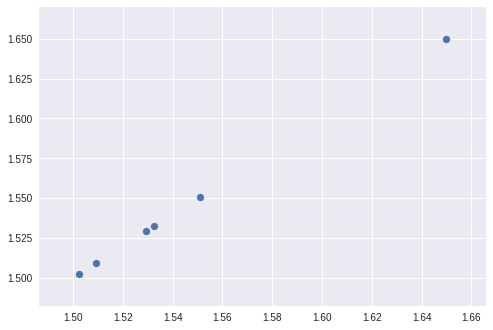

In [34]:
w_train= Original(train_y,DAT_select)
w_test= Original(test_y,DAT_select)

test_y=Original(test_y,DAT_select) #só com o y, pq eu quero comparar os meus dados da saída
y1= test_y['Rela_Viscosity']
y2= w_test['Rela_Viscosity']
plt.scatter(y1,y2)

In [44]:
print(DAT.head())

   Temperature   Rela_Viscosity  FracaoV
0      0.000000        0.111111      0.0
1      0.249351        0.072797      0.0
2      0.498703        0.034483      0.0
3      0.748101        0.011494      0.0
4      0.995490        0.000000      0.0


In [51]:
x=[]
#x=DAT[['Temperature','Rela_Viscosity','FracaoV']]).copy()
x=DAT['Temperature','Rela_Viscosity','FracaoV']).copy()
print(x.head())

SyntaxError: ignored